In [115]:
%matplotlib inline
import pandas as pd
import matplotlib as plt
import math

In [2]:
df = pd.read_csv("notas_2014_2017.csv")

In [19]:
alunos_mob = df[df.CODALUNO.isin(df[df["DISCIPLINA"] == "MOBILIDADE ACADÊMICA INTERNACIONAL"].CODALUNO.unique())]

In [83]:
alunos = alunos_mob[alunos_mob["DISCIPLINA"] == "MOBILIDADE ACADÊMICA INTERNACIONAL"].CODALUNO.unique()
alunos

array(['3542C6DCF50297867A4787F2DD5E5BDE',
       '3542C6DCF5029786A1B6B45FCB91283A',
       '3542C6DCF5029786A9EB38DC7EDD5673',
       '3542C6DCF5029786EFE26811BFF7914E',
       '3542C6DCF5029786CFA84E6DA2610D1E',
       '3542C6DCF5029786AE59F24F0107A266',
       '3542C6DCF502978691DD5E7C6C5619D6',
       '3542C6DCF5029786AC4C86C4E266331A',
       '3542C6DCF5029786C13E1261621134ED',
       '3542C6DCF5029786D4AFA34025D7FAF0',
       '3542C6DCF502978625DAAA49E4AC79A3',
       '3542C6DCF5029786AA2BA9B54F645006',
       '3542C6DCF5029786EE0DED6CCEAD93D6',
       '3542C6DCF5029786646D57D814D60BF0',
       '3542C6DCF5029786139679CEFCF0C92B',
       '3542C6DCF502978662A61927511C152B',
       '3542C6DCF50297867BBACFE3EA3BB8B6',
       '3542C6DCF50297865003C56952999FE5',
       '3542C6DCF5029786D4362E36F14A93EF',
       '3542C6DCF5029786891B5354DB9EB2C8',
       '3542C6DCF502978615F64A80572F0A5C',
       '3542C6DCF5029786E7A7FEE10AE9EC28',
       '3542C6DCF502978668F218B3614440A0',
       '354

In [80]:
alunos_periodo = []
for a in alunos:
    periodo_mob = alunos_mob[(alunos_mob["CODALUNO"] == a) & (alunos_mob["DISCIPLINA"] == "MOBILIDADE ACADÊMICA INTERNACIONAL")].PERIODO
    alunos_periodo.append((a, periodo_mob.iloc[0]))
print len(alunos_periodo)

518


In [121]:
notas = []
for l in alunos_periodo:
    aluno = l[0]
    periodo = l[1]
    notas_antes = alunos_mob[(alunos_mob["CODALUNO"] == aluno)&(alunos_mob["PERIODO"] < periodo)].NOTA
    notas_depois = alunos_mob[(alunos_mob["CODALUNO"] == aluno)&(alunos_mob["PERIODO"] > periodo)].NOTA
    notas.append((notas_antes.mean(), aluno, notas_depois.mean()))
notas

[(nan, '3542C6DCF50297867A4787F2DD5E5BDE', 8.625),
 (10.0, '3542C6DCF5029786A1B6B45FCB91283A', 10.0),
 (nan, '3542C6DCF5029786A9EB38DC7EDD5673', 5.4500000000000002),
 (nan, '3542C6DCF5029786EFE26811BFF7914E', 9.0875000000000004),
 (nan, '3542C6DCF5029786CFA84E6DA2610D1E', 9.0),
 (nan, '3542C6DCF5029786AE59F24F0107A266', 8.2266666666666666),
 (8.9000000000000004, '3542C6DCF502978691DD5E7C6C5619D6', 10.0),
 (nan, '3542C6DCF5029786AC4C86C4E266331A', 10.0),
 (0.0, '3542C6DCF5029786C13E1261621134ED', 10.0),
 (9.5250000000000004, '3542C6DCF5029786D4AFA34025D7FAF0', nan),
 (nan, '3542C6DCF502978625DAAA49E4AC79A3', 8.8599999999999994),
 (nan, '3542C6DCF5029786AA2BA9B54F645006', 6.2999999999999998),
 (nan, '3542C6DCF5029786EE0DED6CCEAD93D6', 7.6083333333333334),
 (nan, '3542C6DCF5029786646D57D814D60BF0', 7.0625),
 (9.6500000000000004, '3542C6DCF5029786139679CEFCF0C92B', 10.0),
 (nan, '3542C6DCF502978662A61927511C152B', 9.5142857142857142),
 (nan, '3542C6DCF50297867BBACFE3EA3BB8B6', 7.8624999999

In [123]:
notas_filtradas = []
for l in notas:
    if not (math.isnan(l[0]) or math.isnan(l[2])):
        notas_filtradas.append(l)
print len(notas_filtradas)

231


In [124]:
n = zip(*notas_filtradas)
notas_df = pd.DataFrame(
            {
                "CODALUNO": n[1],
                "NOTAS_ANTES": n[0],
                "NOTAS_DEPOIS": n[2]}
            )

In [128]:
notas_df["DIFF_NOTAS"] = notas_df.NOTAS_DEPOIS - notas_df.NOTAS_ANTES

In [129]:
notas_df.head()

,CODALUNO,NOTAS_ANTES,NOTAS_DEPOIS,DIFF_NOTAS
0,3542C6DCF5029786A1B6B45FCB91283A,10.000000,10.000,0.000000
1,3542C6DCF502978691DD5E7C6C5619D6,8.900000,10.000,1.100000
2,3542C6DCF5029786C13E1261621134ED,0.000000,10.000,10.000000
3,3542C6DCF5029786139679CEFCF0C92B,9.650000,10.000,0.350000
4,3542C6DCF5029786891B5354DB9EB2C8,8.185714,9.675,1.489286


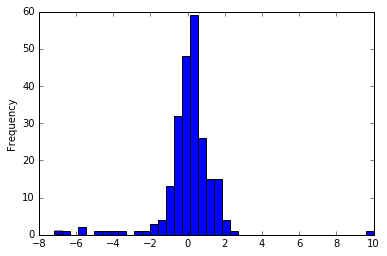

In [139]:
(notas_df.DIFF_NOTAS).plot(kind='hist',bins=40)

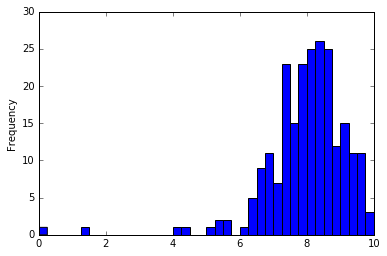

In [135]:
(notas_df.NOTAS_ANTES).plot(kind='hist',bins=40)

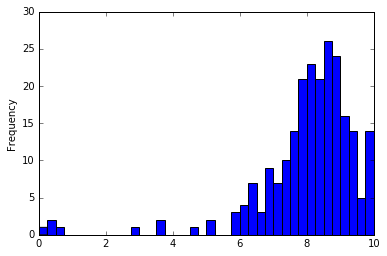

In [136]:
(notas_df.NOTAS_DEPOIS).plot(kind='hist',bins=40)

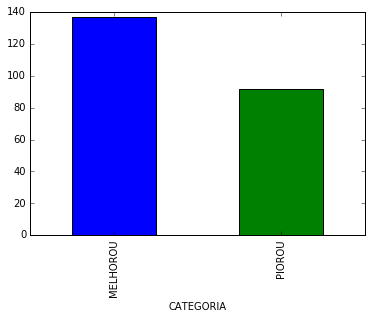

In [142]:
cats = ["MELHOROU", "PIOROU"]
quants = [notas_df[notas_df.DIFF_NOTAS > 0].shape[0],notas_df[notas_df.DIFF_NOTAS < 0].shape[0]]

diff_df = pd.DataFrame(
            {
                "CATEGORIA": cats,
                "QUANTIDADE": quants }
        )
diff_df.set_index('CATEGORIA').QUANTIDADE.plot(kind="bar")

[7.9789338141025388, 8.0287251010151834]


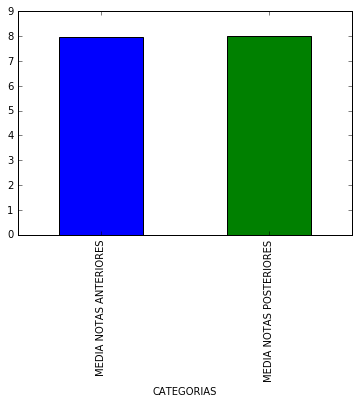

In [155]:
cats2 = ["MEDIA NOTAS ANTERIORES", "MEDIA NOTAS POSTERIORES"]
notas2 = [notas_df["NOTAS_ANTES"].mean(), notas_df["NOTAS_DEPOIS"].mean()]
print notas2

media_df = pd.DataFrame(
            {
                "CATEGORIAS": cats2,
                "MEDIAS": notas2
            }
        )

media_df.set_index('CATEGORIAS').MEDIAS.plot(kind="bar")